<a href="https://colab.research.google.com/github/Wishbone23pika/BME_310/blob/lung_colon_cancer-detection/BME310_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [6]:
import matplotlib.pyplot as plt
import cv2

In [7]:
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip drive/MyDrive/lung_colon_image_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: lung_colon_image_set/lung_scc/lungscc1.jpeg  
  inflating: lung_colon_image_set/lung_scc/lungscc10.jpeg  
  inflating: lung_colon_image_set/lung_scc/lungscc100.jpeg  
  inflating: lung_colon_image_set/lung_scc/lungscc1000.jpeg  
  inflating: lung_colon_image_set/lung_scc/lungscc1001.jpeg  
  inflating: lung_colon_image_set/lung_scc/lungscc1002.jpeg  
  inflating: lung_colon_image_set/lung_scc/lungscc1003.jpeg  
  inflating: lung_colon_image_set/lung_scc/lungscc1004.jpeg  
  inflating: lung_colon_image_set/lung_scc/lungscc1005.jpeg  
  inflating: lung_colon_image_set/lung_scc/lungscc1006.jpeg  
  inflating: lung_colon_image_set/lung_scc/lungscc1007.jpeg  
  inflating: lung_colon_image_set/lung_scc/lungscc1008.jpeg  
  inflating: lung_colon_image_set/lung_scc/lungscc1009.jpeg  
  inflating: lung_colon_image_set/lung_scc/lungscc101.jpeg  
  inflating: lung_colon_image_set/lung_scc/lungscc1010.jpeg  
  inflating: lung_colon_im

In [3]:
lung_colon_dir='lung_colon_image_set'
lung_aca='lung_colon_image_set/lung_aca'
lung_n='lung_colon_image_set/lung_n'
lung_scc='lung_colon_image_set/lung_scc'
colon_aca= 'lung_colon_image_set/colon_aca'
colon_n='lung_colon_image_set/colon_n'

Text(0.5, 1.0, 'Colon N sample')

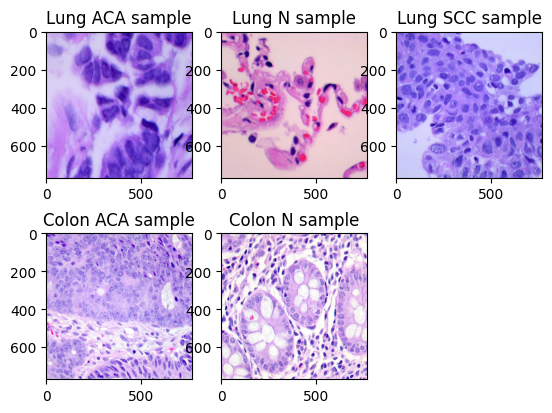

In [15]:
plt.subplot(2, 3, 1)
img = cv2.imread(os.path.join(lung_aca, os.listdir(lung_aca)[0]))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Lung ACA sample')

plt.subplot(2, 3, 2)
img = cv2.imread(os.path.join(lung_n, os.listdir(lung_n)[0]))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Lung N sample')

plt.subplot(2, 3, 3)
img = cv2.imread(os.path.join(lung_scc, os.listdir(lung_scc)[0]))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Lung SCC sample')

plt.subplot(2, 3, 4)
img = cv2.imread(os.path.join(colon_aca, os.listdir(colon_aca)[0]))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Colon ACA sample')

plt.subplot(2, 3, 5)
img = cv2.imread(os.path.join(colon_n, os.listdir(colon_n)[0]))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Colon N sample')

In [17]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
SIZE_X=SIZE_Y=224
data=ImageDataGenerator(validation_split = 0.3)
BATCH_SIZE = 128

training=data.flow_from_directory(lung_colon_dir,
                                  class_mode = "categorical",
                                  target_size = (SIZE_X,SIZE_Y),
                                  color_mode="rgb",
                                  batch_size = 128,
                                  shuffle = False,
                                  subset='training',
                                  seed = 42)

validation=data.flow_from_directory(lung_colon_dir,
                                    class_mode = "categorical",
                                    target_size = (SIZE_X,SIZE_Y),
                                    color_mode="rgb",
                                    batch_size = 128,
                                    shuffle = False,
                                    subset='validation',
                                    seed = 42)

Found 17500 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.


In [19]:
from tensorflow.keras.models import Sequential

In [20]:
# ResNet101
Image_Size=[224,224]

resnet=Sequential()

In [21]:
from tensorflow.keras.applications import ResNet101

In [22]:
resnet.add(ResNet101(input_shape=Image_Size+[3],weights='imagenet',include_top=False,pooling='average'))

171446536/171446536 [==============================] - 1s 0us/step


In [24]:
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [23]:
# This is to ensure the base won't be trained again
for layer in resnet.layers:
    layer.trainable=False

In [25]:
flatten=Flatten()(resnet.output)
dense=Dense(256,activation='relu')(flatten)
dense=Dense(128,activation='relu')(dense)
dense=Dropout(0.2)(dense)   # We add a dropout here to prevent overfitting
prediction=Dense(5,activation='softmax')(dense)

In [26]:
from tensorflow.keras.models import Model

In [27]:
resmodel=Model(inputs=resnet.input,outputs=prediction)

resmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101_input (InputLaye  [(None, 224, 224, 3)]     0         
 r)                                                              
                                                                 
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                             

In [28]:
resmodel.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
reshistory=resmodel.fit(training,validation_data=(validation),epochs=5,verbose=1)

Epoch 1/5
137/137 [==============================] - 169s 1s/step - loss: 10.5225 - accuracy: 0.7511 - val_loss: 0.8523 - val_accuracy: 0.8999
Epoch 2/5
137/137 [==============================] - 140s 1s/step - loss: 0.4708 - accuracy: 0.9295 - val_loss: 0.0966 - val_accuracy: 0.9684
Epoch 3/5
137/137 [==============================] - 140s 1s/step - loss: 0.1442 - accuracy: 0.9612 - val_loss: 0.1043 - val_accuracy: 0.9667
Epoch 4/5
137/137 [==============================] - 139s 1s/step - loss: 0.0962 - accuracy: 0.9697 - val_loss: 0.0748 - val_accuracy: 0.9732
Epoch 5/5
137/137 [==============================] - 181s 1s/step - loss: 0.2076 - accuracy: 0.9657 - val_loss: 1.1560 - val_accuracy: 0.8761
